In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload
threeML_config["parallel"]["use_parallel"]=True

Welcome to JupyROOT 6.24/06


10:00:49 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=70986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=892076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


10:00:50 INFO      Starting 3ML!                                                                     ]8;id=203947;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=894726;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=157970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=925903;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=477865;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=559093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=383376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=527831;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

10:00:50 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=144292;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=265497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=449280;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=891474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

10:00:51 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=984581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=343924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

10:00:51 WARNING   No fermitools installed                                              ]8;id=307422;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=240852;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load sub from Mystat: : 40it [00:00, 86.17it/s]                            

Yourlib init successfully!!!


In [2]:
Modelname="Fullsky_freek_catalog"
ra1,dec1=0,90
data_radius = 110.0
model_radius = 120.0
roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)
# lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=6,  detector="WCDA", roi=roi, pf=True)
lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=15, rtindex=8, rtp=5,  detector="WCDA", roi=roi, pf=True, sf=True, kf=True, indexf=True, mkf=True, mindexf=True, ifext_mt_2=True)
Diffuse = my.set_diffusebkg(
            17.387411424977117, 62.79899812924395, 110, 10, K=5.9e-11, Kb=(1e-12, 1e-10), index=-2.84, indexb=(-4,-2), Kf=False, indexf=False, name="Fullsky"
            )

lm.add_source(Diffuse)
lm

19:48:04 INFO      J0007P7303u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=334930;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=959647;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=367038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=966622;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.01e-13 kb=(5.01e-15, 2.17e-12) index=-2.74 indexb=(-3.62,-1.86)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=473213;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=678134;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

19:48:05 INFO      J0056P6346u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=44194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=87393;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=68105;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=515222;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.45e-13 kb=(1.45e-15, 7.60e-13) index=-2.35 indexb=(-3.39,-1.31)                             

         INFO      Mor:                                                                                ]8;id=975059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=835987;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.33 sb=(0.00,0.89) fitrange=0.75                                                         

         INFO      J0249P6022 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=39905;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=941220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=767445;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=801157;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.96e-13 kb=(1.96e-15, 9.61e-13) index=-2.52 indexb=(-3.80,-1.24)                             

         INFO      Mor:                                                                                ]8;id=121668;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=577623;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.71 sb=(0.00,1.51) fitrange=2.00                                                         

         INFO      J0343P5254u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=297275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268031;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=512599;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=429798;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.90e-14 kb=(1.00e-15, 2.24e-13) index=-1.70 indexb=(-3.22,-1.00)                             

         INFO      Mor:                                                                                ]8;id=372953;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=186010;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.33 sb=(0.00,0.73) fitrange=0.90                                                         

         INFO      J0359P5406 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=691551;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=4787;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=764261;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=213653;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.80e-14 kb=(1.00e-15, 1.98e-13) index=-1.74 indexb=(-3.98,-1.00)                             

         INFO      Mor:                                                                                ]8;id=15859;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=293328;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.22 sb=(0.00,0.62) fitrange=0.70                                                         

         INFO      J0428P5531 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=778391;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=312829;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=735059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=584274;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.73e-13 kb=(4.73e-15, 1.45e-12) index=-2.66 indexb=(-3.46,-1.86)                             

         INFO      Mor:                                                                                ]8;id=94277;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=681061;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.18 sb=(0.22,2.14) fitrange=1.80                                                         

         INFO      J0500P4454 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=74746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=812729;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=219718;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=814014;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=6.90e-14 kb=(1.00e-15, 3.09e-13) index=-2.53 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=347734;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=940916;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.41 sb=(0.00,0.97) fitrange=1.40                                                         

         INFO      J0534P3533 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=930146;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=344244;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=283657;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=493399;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.30e-14 kb=(1.00e-15, 2.08e-13) index=-2.37 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.90                                                                  ]8;id=279579;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=924466;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

19:48:06 INFO      J0534P2200u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=243562;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=894164;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=691711;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=863605;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.11e-12 kb=(2.11e-14, 2.27e-12) index=-2.69 indexb=(-2.77,-2.61)                             

         INFO      Mor: fitrange=0.02                                                                  ]8;id=17400;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=598610;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J0542P2311u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=441682;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=924756;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=680790;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=354041;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.08e-13 kb=(2.08e-15, 1.02e-12) index=-1.95 indexb=(-2.99,-1.00)                             

         INFO      Mor:                                                                                ]8;id=928234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=418547;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.45 sb=(0.01,2.89) fitrange=2.50                                                         

         INFO      J0617P2234 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=278673;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=394551;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=906918;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=746780;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.95e-13 kb=(1.95e-15, 6.00e-13) index=-2.92 indexb=(-4.00,-1.80)                             

         INFO      Mor:                                                                                ]8;id=718003;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=7552;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.59 sb=(0.00,1.23) fitrange=0.90                                                         

         INFO      J0622P3754 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=133598;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=497639;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=494160;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=774248;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.90e-14 kb=(1.00e-15, 2.94e-13) index=-1.82 indexb=(-3.58,-1.00)                             

         INFO      Mor:                                                                                ]8;id=303554;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=38468;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.50 sb=(0.00,1.22) fitrange=1.45                                                         

         INFO      J0634P1741u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=473782;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=494154;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=210893;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=717501;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.53e-13 kb=(1.53e-15, 1.13e-12) index=-1.65 indexb=(-2.85,-1.00)                             

         INFO      Mor:                                                                                ]8;id=247139;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=415822;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.16 sb=(0.00,2.52) fitrange=1.40                                                         

         INFO      J0633P1647 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=295926;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=848897;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=353543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=537191;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.17e-13 kb=(3.17e-15, 6.50e-13) index=-2.21 indexb=(-2.57,-1.85)                             

         INFO      Mor:                                                                                ]8;id=185567;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=578746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=5.96 sb=(3.55,8.38) fitrange=1.90                                                         

         INFO      J0703P1405 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=608966;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=364049;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=112448;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=251054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.27e-13 kb=(2.27e-15, 1.34e-12) index=-1.98 indexb=(-2.94,-1.02)                             

         INFO      Mor:                                                                                ]8;id=248694;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=116007;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.30 sb=(0.00,2.98) fitrange=2.40                                                         

19:48:07 INFO      J1104P3810 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=513108;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=140425;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=504071;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=407201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.68e-13 kb=(3.68e-15, 5.18e-13) index=-3.41 indexb=(-3.65,-3.17)                             

         INFO      Mor: fitrange=0.05                                                                  ]8;id=920504;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=209849;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1219P2915 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=285263;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=999402;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=661798;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=366788;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.40e-14 kb=(1.00e-15, 1.24e-13) index=-2.67 indexb=(-4.00,-1.31)                             

         INFO      Mor: fitrange=0.45                                                                  ]8;id=518184;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=308161;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1653P3943 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=916936;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=822776;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=198621;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=55743;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.77e-13 kb=(3.77e-15, 4.97e-13) index=-2.94 indexb=(-3.10,-2.78)                             

         INFO      Mor: fitrange=0.05                                                                  ]8;id=592872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=552209;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1727P5016 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=562789;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=266029;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=72949;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=419878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.90e-14 kb=(1.00e-15, 1.69e-13) index=-3.09 indexb=(-4.00,-1.41)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=856980;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=871350;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1809M1918u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=106706;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=14144;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=795348;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=652271;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.46e-13 kb=(3.46e-15, 1.26e-12) index=-2.24 indexb=(-2.72,-1.76)                             

         INFO      Mor:                                                                                ]8;id=90986;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=761736;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.35 sb=(0.00,0.83) fitrange=1.00                                                         

         INFO      J1813M1245 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=884386;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=45881;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=990038;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=453251;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.44e-13 kb=(2.44e-15, 9.04e-13) index=-2.61 indexb=(-3.25,-1.97)                             

         INFO      Mor: fitrange=1.05                                                                  ]8;id=462688;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=127182;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

19:48:08 INFO      J1814M1719u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=800097;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=994265;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=305256;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=179548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.65e-12 kb=(2.65e-14, 6.34e-12) index=-2.83 indexb=(-3.31,-2.35)                             

         INFO      Mor:                                                                                ]8;id=778718;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=671334;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.71 sb=(0.15,1.27) fitrange=1.35                                                         

         INFO      J1825M1418 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=293143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=310203;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=573974;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=337837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.92e-12 kb=(3.92e-14, 7.37e-12) index=-2.98 indexb=(-3.38,-2.58)                             

         INFO      Mor:                                                                                ]8;id=654100;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=325461;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.81 sb=(0.41,1.21) fitrange=0.95                                                         

         INFO      J1825M1256u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=455440;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=400408;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=241837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=382924;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=8.27e-13 kb=(8.27e-15, 1.64e-12) index=-2.61 indexb=(-2.85,-2.37)                             

         INFO      Mor:                                                                                ]8;id=674233;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=580216;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.40                                                         

         INFO      J1825M1337u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=971275;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=654753;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=481482;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=94095;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.04e-12 kb=(1.04e-14, 1.88e-12) index=-2.55 indexb=(-2.79,-2.31)                             

         INFO      Mor:                                                                                ]8;id=896935;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=61522;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.25                                                         

         INFO      J1831M1007u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=638516;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=276640;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=282618;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=962220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.78e-12 kb=(1.78e-14, 3.37e-12) index=-2.71 indexb=(-3.03,-2.39)                             

         INFO      Mor:                                                                                ]8;id=676234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=724563;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=0.80                                                         

         INFO      J1834M0831 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=333137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=174407;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=16428;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=241496;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.99e-13 kb=(5.99e-15, 2.23e-12) index=-3.08 indexb=(-4.00,-2.04)                             

         INFO      Mor:                                                                                ]8;id=539888;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=500839;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.40 sb=(0.00,0.96) fitrange=1.10                                                         

         INFO      J1837M0654u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=595762;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=311589;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=989894;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=726505;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.55e-12 kb=(1.55e-14, 2.36e-12) index=-2.92 indexb=(-3.16,-2.68)                             

         INFO      Mor:                                                                                ]8;id=363390;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=293565;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.34 sb=(0.26,0.42) fitrange=0.30                                                         

         INFO      J1839M0548u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=739908;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=720884;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=685422;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=918011;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.62e-13 kb=(4.62e-15, 8.97e-13) index=-2.65 indexb=(-2.97,-2.33)                             

         INFO      Mor:                                                                                ]8;id=228321;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723496;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.22 sb=(0.06,0.38) fitrange=0.35                                                         

19:48:09 INFO      J1841M0519 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=114540;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=571784;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=919939;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=279060;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.52e-12 kb=(1.52e-14, 2.78e-12) index=-2.88 indexb=(-3.20,-2.56)                             

         INFO      Mor:                                                                                ]8;id=955895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=608208;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.60 sb=(0.36,0.84) fitrange=0.45                                                         

         INFO      J1843M0335u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=588723;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=794391;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=86153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=290156;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=9.01e-13 kb=(9.01e-15, 1.55e-12) index=-2.58 indexb=(-2.82,-2.34)                             

         INFO      Mor:                                                                                ]8;id=75483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=239972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.30                                                         

         INFO      J1848M0153u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=554171;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=829616;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=121342;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=938914;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=7.05e-13 kb=(7.05e-15, 1.31e-12) index=-2.65 indexb=(-2.97,-2.33)                             

         INFO      Mor:                                                                                ]8;id=439688;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=314808;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.50                                                         

         INFO      J1850M0004u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=72046;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=79603;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=513972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=872895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.30e-13 kb=(5.30e-15, 1.01e-12) index=-2.49 indexb=(-2.81,-2.17)                             

         INFO      Mor:                                                                                ]8;id=787147;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=319092;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.46 sb=(0.30,0.62) fitrange=0.40                                                         

         INFO      J1852P0050u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=181807;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=56944;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=626666;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=863053;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.67e-13 kb=(4.67e-15, 1.52e-12) index=-2.74 indexb=(-3.22,-2.26)                             

         INFO      Mor:                                                                                ]8;id=387833;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=335292;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.64 sb=(0.08,1.20) fitrange=1.00                                                         

         INFO      J1857P0245 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=623923;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=193872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=232228;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=272685;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.04e-13 kb=(4.04e-15, 1.26e-12) index=-2.93 indexb=(-3.49,-2.37)                             

         INFO      Mor:                                                                                ]8;id=390073;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=986589;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.24 sb=(0.00,0.56) fitrange=0.55                                                         

         INFO      J1857P0203u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=849164;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=775269;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=995751;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=236276;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.68e-13 kb=(1.68e-15, 8.13e-13) index=-2.46 indexb=(-3.34,-1.58)                             

         INFO      Mor:                                                                                ]8;id=270289;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=629812;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.19 sb=(0.00,0.43) fitrange=0.55                                                         

19:48:10 INFO      J1858P0330 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=791029;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=159553;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=708417;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=382513;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.84e-13 kb=(2.84e-15, 1.23e-12) index=-2.63 indexb=(-3.43,-1.83)                             

         INFO      Mor:                                                                                ]8;id=396963;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=873440;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.52 sb=(0.00,1.16) fitrange=1.70                                                         

         INFO      J1902P0648 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=884440;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=476072;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=948996;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=978849;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-3.83,-1.00)                             

         INFO      Mor: fitrange=0.50                                                                  ]8;id=226766;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=949394;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1905P0630 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=497210;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=330116;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=177543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=37395;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.17e-13 kb=(2.17e-15, 5.31e-13) index=-2.66 indexb=(-3.13,-2.18)                             

         INFO      Mor:                                                                                ]8;id=775015;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=494017;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=3.00 sb=(0.33,5.67) fitrange=1.25                                                         

         INFO      J1906P0712 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=148743;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=132204;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=451188;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=904409;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.01e-13 kb=(1.01e-15, 4.76e-13) index=-2.72 indexb=(-3.92,-1.52)                             

         INFO      Mor:                                                                                ]8;id=780922;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=961992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.05                                                         

         INFO      J1907P0826 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=769619;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=313471;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=697052;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=884355;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.34e-13 kb=(1.34e-15, 5.69e-13) index=-2.62 indexb=(-3.74,-1.50)                             

         INFO      Mor:                                                                                ]8;id=15305;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=160361;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.43 sb=(0.00,1.07) fitrange=1.55                                                         

         INFO      J1908P0615u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=472234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=321106;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=582751;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=875307;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=7.97e-13 kb=(7.97e-15, 1.61e-12) index=-2.42 indexb=(-2.66,-2.18)                             

         INFO      Mor:                                                                                ]8;id=222143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=236855;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.25                                                         

         INFO      J1910P0516 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=464802;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=121004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=395250;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=268162;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-3.74,-1.34)                             

         INFO      Mor:                                                                                ]8;id=885413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=144771;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=1.90                                                         

19:48:11 INFO      J1912P1014u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=72292;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=65433;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=393432;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=101513;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.07e-13 kb=(3.07e-15, 6.67e-13) index=-2.68 indexb=(-3.16,-2.20)                             

         INFO      Mor:                                                                                ]8;id=444067;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=89561;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.36 sb=(0.12,0.60) fitrange=0.40                                                         

         INFO      J1914P1150u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=262629;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=661044;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=929878;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=283298;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.09e-13 kb=(1.09e-15, 2.89e-13) index=-2.34 indexb=(-2.90,-1.78)                             

         INFO      Mor:                                                                                ]8;id=867652;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=761648;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.33 sb=(0.01,0.65) fitrange=0.70                                                         

         INFO      J1922P1403 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=539837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=378514;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=421059;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=773927;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.37e-13 kb=(1.37e-15, 2.87e-13) index=-2.62 indexb=(-3.18,-2.06)                             

         INFO      Mor:                                                                                ]8;id=123886;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=205983;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.18 sb=(0.02,0.34) fitrange=0.35                                                         

         INFO      J1924P1609 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=888977;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=929581;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=308752;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=309943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.44e-13 kb=(4.44e-15, 1.06e-12) index=-2.54 indexb=(-3.18,-1.90)                             

         INFO      Mor:                                                                                ]8;id=722289;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=678194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.45 sb=(0.57,2.33) fitrange=2.15                                                         

         INFO      J1928P1746u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=360693;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=968703;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=87742;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=200919;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=7.90e-14 kb=(1.00e-15, 1.54e-13) index=-2.22 indexb=(-2.62,-1.82)                             

         INFO      Mor:                                                                                ]8;id=540483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=919237;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.35                                                         

         INFO      J1929P1846u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=505485;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=92321;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=361715;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=521580;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.48e-13 kb=(2.48e-15, 4.13e-13) index=-2.37 indexb=(-2.69,-2.05)                             

         INFO      Mor:                                                                                ]8;id=377122;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=776537;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.49 sb=(0.33,0.65) fitrange=0.50                                                         

         INFO      J1937P2128 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=992044;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=269952;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=107484;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=530668;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.08e-13 kb=(2.08e-15, 1.09e-12) index=-2.43 indexb=(-3.71,-1.15)                             

         INFO      Mor:                                                                                ]8;id=569297;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=968812;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.25 sb=(0.00,3.09) fitrange=4.05                                                         

19:48:12 INFO      J1945P2424 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=655927;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=3653;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=73860;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=720718;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=4.27e-13 kb=(4.27e-15, 1.19e-12) index=-2.56 indexb=(-3.20,-1.92)                             

         INFO      Mor:                                                                                ]8;id=119361;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=793375;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.29 sb=(0.41,2.17) fitrange=1.85                                                         

         INFO      J1952P2922 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=651576;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=939775;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=987291;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=766363;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.50e-14 kb=(1.00e-15, 1.30e-13) index=-2.52 indexb=(-3.32,-1.72)                             

         INFO      Mor: fitrange=0.35                                                                  ]8;id=555259;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=880745;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1954P2836u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=912227;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=335045;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=981875;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=5126;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.40e-14 kb=(1.00e-15, 9.40e-14) index=-2.22 indexb=(-2.94,-1.50)                             

         INFO      Mor: fitrange=0.35                                                                  ]8;id=913872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=145236;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J1954P3253 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=167247;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=186548;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=473423;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=478801;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=6.20e-14 kb=(1.00e-15, 1.52e-13) index=-2.45 indexb=(-3.17,-1.73)                             

         INFO      Mor:                                                                                ]8;id=422328;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=883512;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.17 sb=(0.00,0.41) fitrange=0.45                                                         

         INFO      J1956P2921 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=741407;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=655304;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=476735;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=784058;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.47e-13 kb=(1.47e-15, 3.87e-13) index=-2.03 indexb=(-2.51,-1.55)                             

         INFO      Mor:                                                                                ]8;id=626442;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=286527;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.99 sb=(0.43,1.55) fitrange=1.90                                                         

         INFO      J2002P3244u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=231201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=744943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=166683;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=356641;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.40e-14 kb=(1.00e-15, 1.24e-13) index=-2.21 indexb=(-3.09,-1.33)                             

         INFO      Mor: fitrange=0.45                                                                  ]8;id=288894;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=705158;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J2005P3415 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=547748;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=402876;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=907245;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=319604;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.53e-13 kb=(3.53e-15, 6.68e-13) index=-2.58 indexb=(-2.98,-2.18)                             

         INFO      Mor:                                                                                ]8;id=985544;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=40586;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.74 sb=(0.42,1.06) fitrange=0.80                                                         

19:48:13 INFO      J2005P3050 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=616866;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=513959;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=143053;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=980934;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.90e-14 kb=(1.00e-15, 1.04e-13) index=-1.99 indexb=(-2.79,-1.19)                             

         INFO      Mor:                                                                                ]8;id=503709;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=958230;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.21 sb=(0.00,0.53) fitrange=0.65                                                         

         INFO      J2004P3252 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=460497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=653507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=8917;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=712450;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.45e-13 kb=(1.45e-15, 2.86e-13) index=-2.65 indexb=(-3.20,-2.09)                             

         INFO      Mor:                                                                                ]8;id=719411;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=131718;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=6.07 sb=(2.31,9.84) fitrange=3.00                                                         

         INFO      J2018P3643u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=243703;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=33507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=66082;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=690023;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.19e-13 kb=(2.19e-15, 3.09e-13) index=-1.94 indexb=(-2.10,-1.78)                             

         INFO      Mor:                                                                                ]8;id=463577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=261680;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.26 sb=(0.18,0.34) fitrange=0.15                                                         

         INFO      J2020P4034 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=796609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=796148;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=49062;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=887263;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.36e-13 kb=(2.36e-15, 4.76e-13) index=-2.91 indexb=(-3.39,-2.43)                             

         INFO      Mor:                                                                                ]8;id=10965;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=741493;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.38 sb=(0.14,0.62) fitrange=0.40                                                         

         INFO      J2020P3638 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=874157;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=617959;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=131133;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=774416;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.59e-13 kb=(3.59e-15, 1.00e-12) index=-2.62 indexb=(-3.34,-1.90)                             

         INFO      Mor:                                                                                ]8;id=936292;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=506152;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.27 sb=(0.39,2.15) fitrange=1.70                                                         

         INFO      J2020P3649u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=638908;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=969017;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=297672;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=943875;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.50e-14 kb=(1.00e-15, 2.95e-13) index=-1.78 indexb=(-3.22,-1.00)                             

         INFO      Mor:                                                                                ]8;id=474101;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=365483;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.15 sb=(0.00,0.31) fitrange=0.90                                                         

         INFO      J2028P4052 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=961809;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=903543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=473584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=681191;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.52e-13 kb=(1.52e-15, 3.56e-13) index=-2.60 indexb=(-2.96,-2.25)                             

         INFO      Mor:                                                                                ]8;id=972427;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=930918;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=2.44 sb=(1.47,3.40) fitrange=0.90                                                         

19:48:14 INFO      J2031P4052u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=255464;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=392938;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=18116;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=372260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=7.70e-14 kb=(1.00e-15, 2.57e-13) index=-2.81 indexb=(-4.00,-1.53)                             

         INFO      Mor:                                                                                ]8;id=23571;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=561914;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.25 sb=(0.00,0.65) fitrange=0.95                                                         

         INFO      J2031P4127u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=895956;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=384458;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=963545;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=521317;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.07e-13 kb=(3.07e-15, 4.87e-13) index=-2.29 indexb=(-2.53,-2.05)                             

         INFO      Mor:                                                                                ]8;id=726989;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=798088;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.27 sb=(0.19,0.35) fitrange=0.20                                                         

         INFO      J2108P5153u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=768446;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=953955;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=254255;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=139676;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=8.00e-15 kb=(1.00e-15, 3.80e-14) index=-1.44 indexb=(-2.08,-1.00)                             

         INFO      Mor:                                                                                ]8;id=945148;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=667339;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.14 sb=(0.00,0.38) fitrange=0.45                                                         

         INFO      ext2WCDA4 in roi: 110.0 sf:True pf:True kf:True indexf:True                         ]8;id=827037;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=731489;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=556380;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=36690;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.24e-13 kb=(1.24e-15, 6.37e-13) index=-2.68 indexb=(-4.00,-1.33)                             

         INFO      Mor:                                                                                ]8;id=287535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=702411;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=4.37 sb=(0.00,10.04) fitrange=4.50                                                        

         INFO      J2200P5643u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=529721;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=51111;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=182742;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=821603;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=3.80e-14 kb=(1.00e-15, 3.98e-13) index=-1.77 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=991969;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=69613;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.43 sb=(0.00,0.99) fitrange=1.00                                                         

         INFO      J2228P6100u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=170578;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=416146;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=197086;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=855242;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=2.37e-13 kb=(2.37e-15, 4.77e-13) index=-2.26 indexb=(-2.58,-1.94)                             

         INFO      Mor:                                                                                ]8;id=751732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=958;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.25 sb=(0.09,0.41) fitrange=0.25                                                         

         INFO      J2229P5927u in roi: 110.0 sf:True pf:True kf:True indexf:True                       ]8;id=1319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=861602;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=756153;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=373206;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.49e-12 kb=(1.49e-14, 2.98e-12) index=-2.67 indexb=(-3.07,-2.27)                             

         INFO      Mor:                                                                                ]8;id=724721;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=806690;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=1.98 sb=(1.18,2.78) fitrange=1.80                                                         

19:48:15 INFO      J2238P5900 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=223133;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=961770;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=301872;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=705177;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.91e-13 kb=(1.91e-15, 5.81e-13) index=-2.39 indexb=(-2.95,-1.83)                             

         INFO      Mor:                                                                                ]8;id=86116;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=243352;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#359\359]8;;\
                   sigma=0.51 sb=(0.19,0.83) fitrange=0.90                                                         

         INFO      J2323P5854 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=512439;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=82132;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=15843;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=719884;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=1.10e-13 kb=(1.10e-15, 3.65e-13) index=-3.18 indexb=(-4.00,-1.90)                             

         INFO      Mor: fitrange=0.70                                                                  ]8;id=593354;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=587558;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      J2346P5138 in roi: 110.0 sf:True pf:True kf:True indexf:True                        ]8;id=464670;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=98761;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#329\329]8;;\

         INFO      Spec:                                                                               ]8;id=65842;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=959220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#357\357]8;;\
                   K=5.70e-14 kb=(1.00e-15, 1.92e-13) index=-3.26 indexb=(-4.00,-1.90)                             

         INFO      Mor: fitrange=0.60                                                                  ]8;id=944934;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=403375;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#367\367]8;;\

         INFO      Set diffuse range: [15.000000000000014, 235.0] [-10, 10]                           ]8;id=611780;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=114496;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1336\1336]8;;\

         INFO      ra dec coner:                                                                      ]8;id=277347;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=252041;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1337\1337]8;;\

         INFO      (283.85528547829585, -20.428206386588343)                                          ]8;id=511435;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=141079;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1338\1338]8;;\

         INFO      (103.74893714402995, -24.10916223633971)                                           ]8;id=532371;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=858430;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1339\1339]8;;\

         INFO      (122.36334911831814, -14.484312127188122)                                          ]8;id=557179;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=719198;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1340\1340]8;;\

         INFO      (265.50541927917124, -10.99199851570554)                                           ]8;id=341251;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=64064;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1341\1341]8;;\

19:48:17 INFO      total sr: 1.3335219352536694                                                       ]8;id=515519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1380\1380]8;;\
                  ratio: 0.48563881438013873                                                                       

         INFO      integration: 9.647305085585121e-05                                                 ]8;id=929600;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=963846;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1381\1381]8;;\
                  ratio: 0.7613225945089526                                                                        

         INFO      set K to: 5.9e-11                                                                  ]8;id=972911;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=527732;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1382\1382]8;;\

         INFO      diffuse file path: ../../data/Fullsky_dust_bkg_template.fits                       ]8;id=842707;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=641028;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1409\1409]8;;\

Model summary:
==============

                   N
Point sources     14
Extended sources  61
Particle sources   0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index -2.84      -4.0      -2.0                

Fixed parameters (434):
(abridged. Use complete=True to see all fixed parameters)


Properties (2):
--------------------

                                                                          value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Fullsky_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                           icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Load sub from Mystat: : 40it [00:20, 88.12it/s]

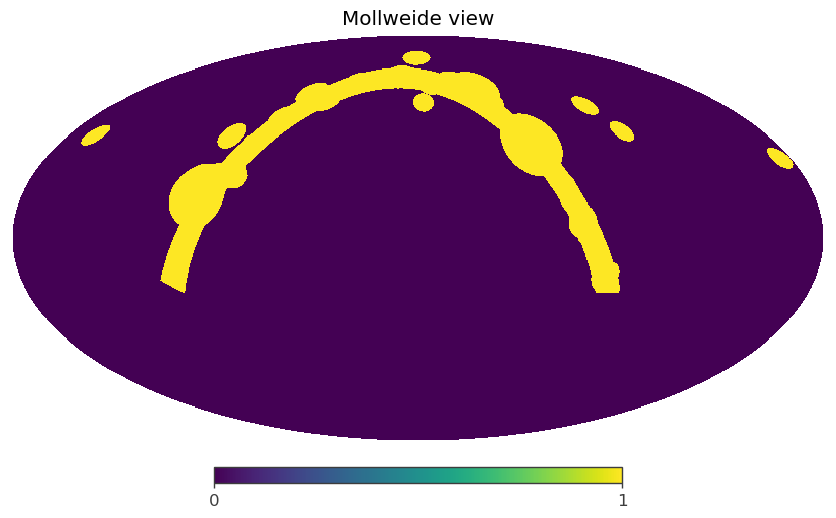

In [3]:
%matplotlib inline
nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = 90-hp.pix2ang(nside, pixIdx)[0]/np.pi*180 # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1]/np.pi*180 # phis, same
signal=np.zeros(npix,dtype=np.float64)
c_icrs = SkyCoord(ra=new_lons*u.degree, dec=new_lats*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

mask = np.zeros(npix,dtype=np.float64)
for psc in lm.point_sources:
    ra = lm.point_sources[psc]._sky_position.ra.value
    dec = lm.point_sources[psc]._sky_position.dec.value
    mask = (mask.astype(np.bool) | (np.array(my.distance(ra, dec, new_lons, new_lats)<=4)))
for exts in lm.extended_sources:
    if exts != "Diffuse":
        ra = lm.extended_sources[exts].spatial_shape.lon0.value
        dec = lm.extended_sources[exts].spatial_shape.lat0.value
        sigma = lm.extended_sources[exts].spatial_shape.sigma.value
        mask = (mask.astype(np.bool) | (np.array(my.distance(ra, dec, new_lons, new_lats)<=np.max([5,2*sigma]))))
mask = (mask.astype(np.bool) | ((c_l>13) & (c_l<233) & (c_b<5) & (c_b>-5)))
mask = (mask.astype(np.bool) & ((new_lats>-20) & (new_lats<80)))
signal[mask]=1
hp.mollview(signal)

19:51:56 INFO      Creating singleton for                                                            ]8;id=263502;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=582594;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_20240131_hscpsf_mc.               
                  root                                                                                             

19:52:12 INFO      Region of Interest:                                                                   ]8;id=328049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=280000;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=864667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=237847;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (0.000, 90.000), model radius:        ]8;id=324509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=787213;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  112.000 deg, display radius: 110.000 deg, threshold = 0.50                                       

         INFO                                                                                            ]8;id=730469;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=52136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=746190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=207407;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=850052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=507997;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 1318 x 1318 px                                                         ]8;id=200010;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=174789;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.17 deg                                                                 ]8;id=683767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=871544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=431672;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=753302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=483793;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=166045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=409859;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=935648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=658580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=585973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_20240131_hscpsf_mc                
                  .root                                                                                            

         INFO      Number of dec bins: 120                                                          ]8;id=180964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=149330;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

19:52:13 INFO      Number of energy/nHit planes per dec bin_name: 7                                 ]8;id=784768;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=815006;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=491483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=918925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=242834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=565666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=907306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=478893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,4.806260e+09,4.803641e+09,1.000545,1008546,3306.508784
1,1,1024,RING,1.054263e+09,1.052439e+09,1.001733,1008546,3306.508784
2,2,1024,RING,1.924129e+08,1.913004e+08,1.005816,1008546,3306.508784
3,3,1024,RING,2.006507e+07,1.972613e+07,1.017182,1008546,3306.508784
4,4,1024,RING,7.058361e+06,6.835371e+06,1.032623,1008546,3306.508784
5,5,1024,RING,9.370652e+05,8.676532e+05,1.080000,1008546,3306.508784
6,6,1024,RING,6.063634e+05,5.755606e+05,1.053518,1008546,3306.508784


         INFO      This Map Tree contains 978.900 transits in the first bin                         ]8;id=75420;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=505294;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 112.96 Mb                                                       ]8;id=147575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=460020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=900646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=522353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (7):                                                        ]8;id=805402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=359864;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=72074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=65360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5', '6']                                                   ]8;id=426446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=704497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

Error in <TTreeFormula::Compile>:  Bad numerical expression : "name"


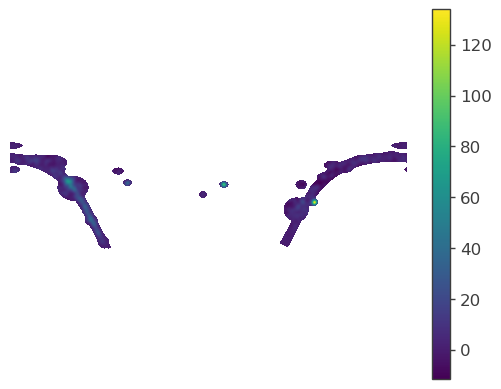

In [4]:
%matplotlib inline
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# maptree =  "../../data/20210305-20230731_trans_fromhsc.root"

# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

# response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

maptree = "../../data/WCDA_20240131_out.root"
response="../../data/DR_ihep_20240131_hscpsf_mc.root"

region_name="Fullsky"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

ra1,dec1=0,90
data_radius = 110.0
model_radius = 112.0

roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

# roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius)
kernelsigma = 0.17

WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=kernelsigma)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 6)
WCDA.display()
fig = WCDA.display_stacked_image(smoothing_kernel_sigma=kernelsigma)
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')
fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

Model summary:
==============

                   N
Point sources     14
Extended sources  61
Particle sources   0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index -2.84      -4.0      -2.0                

Fixed parameters (434):
---------------------

                                                                                      value   
J0007P7303u.position.ra                                                                1.48  \
J0007P7303u.position.dec                                                              73.15   
J0007P7303u.spectrum.main.Powerlaw.K                                                    0.0   
J0007P7303u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J0007P7303u.spectrum.main.Powerlaw.index                                              -2.74   
...                                                                                     ...   
J2346P5138.spectrum.main.Powerlaw.index                                               -3.26   
Diffuse.SpatialTemplate_2D.K                                                            1.0   
Diffuse.SpatialTemplate_2D.hash           1293526596772912674236316201069659694612188528...   
Diffuse.SpatialTemplate_2D.ihdu                                                         0.0   
Diffuse.spectrum.main.Powerlaw.piv                                             3000000000.0   

                                         min_value max_value            unit  
J0007P7303u.position.ra                       0.98      1.98             deg  
J0007P7303u.position.dec                     72.65     73.65             deg  
J0007P7303u.spectrum.main.Powerlaw.K           0.0       0.0  keV-1 s-1 cm-2  
J0007P7303u.spectrum.main.Powerlaw.piv        None      None             keV  
J0007P7303u.spectrum.main.Powerlaw.index     -3.62     -1.86                  
...                                            ...       ...             ...  
J2346P5138.spectrum.main.Powerlaw.index       -4.0      -1.9                  
Diffuse.SpatialTemplate_2D.K                  None      None           deg-2  
Diffuse.SpatialTemplate_2D.hash               None      None                  
Diffuse.SpatialTemplate_2D.ihdu                0.0      None                  
Diffuse.spectrum.main.Powerlaw.piv            None      None             keV  

[434 rows x 4 columns]

Properties (2):
--------------------

                                                                          value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Fullsky_dust_bkg_template.fits  \
Diffuse.SpatialTemplate_2D.frame                                           icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

19:52:29 INFO      Considering 7 dec bins for extended source J0056P6346u           ]8;id=136924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 63.960                      ]8;id=12392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=454366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J0249P6022           ]8;id=262325;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=460616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 60.490                      ]8;id=625244;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=328166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J0343P5254u           ]8;id=910651;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=416152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 53.050                      ]8;id=139700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=773295;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J0359P5406            ]8;id=754696;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=978219;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 54.210                      ]8;id=274386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=302833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J0428P5531           ]8;id=730512;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=489284;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 55.530                      ]8;id=879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=648855;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J0500P4454            ]8;id=818783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=460125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 44.920                      ]8;id=511090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=819595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

19:52:30 INFO      Considering 15 dec bins for extended source J0542P2311u          ]8;id=319550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=350045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.190                      ]8;id=515838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=571782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J0617P2234            ]8;id=372770;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=763799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 22.570                      ]8;id=25501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=762642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J0622P3754            ]8;id=49384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=637821;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 37.930                      ]8;id=455141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=601416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J0634P1741u          ]8;id=620385;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=861854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.720                      ]8;id=966620;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=725992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 36 dec bins for extended source J0633P1647           ]8;id=400095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=650039;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 15.328                      ]8;id=82473;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=808664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 15 dec bins for extended source J0703P1405           ]8;id=147362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=883756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.550                      ]8;id=581043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=31474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=302652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=486103;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=268179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=408271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=786699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=534441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=679838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=784234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=155520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=746642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=604601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=781946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=105392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=551882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=58268;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=274854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=505730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=923500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=262060;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=961639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=811810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=19027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=227536;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=434416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=873701;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=276188;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=201982;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=261059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

19:52:31 INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=723595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=942186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=243924;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=886571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=900115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=919605;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=259149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=28031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=193034;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=857491;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=29596;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=447682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=893660;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=656169;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=298640;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=506438;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=611406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=290791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=222827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=64180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=680834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=387199;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=789613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=842300;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=174773;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=3098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=902544;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=722519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=735011;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=128004;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=526286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=284437;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=672289;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=221625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=947811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=814148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=264052;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=344949;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=787795;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=38068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 26 dec bins for extended source J1905P0630           ]8;id=5652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=588973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.184                       ]8;id=176050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=386888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=964917;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=887306;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=873005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=82913;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=799466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=343948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=281362;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=497304;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

19:52:32 INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=781067;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=960710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=736966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=140749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=598255;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=314633;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=253899;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=976077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=921134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=105654;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=766211;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=682135;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=514867;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=814220;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=66740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=535766;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=575594;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=850556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=257991;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=690238;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J1924P1609           ]8;id=664081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=559481;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=900740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=998258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=930752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=861525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=832577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=515479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1929P1846u           ]8;id=942522;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=45716;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=135031;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=447879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 15 dec bins for extended source J1937P2128           ]8;id=216496;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=45646;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=743051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=886450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J1945P2424           ]8;id=125145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=493180;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=77460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=617754;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1954P3253            ]8;id=567430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=629073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 32.880                      ]8;id=717123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=329683;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1956P2921            ]8;id=21080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=399963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.350                      ]8;id=657070;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=191742;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J2005P3415            ]8;id=829331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=88144;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 34.250                      ]8;id=85371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=614343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=417133;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=298510;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 30.990                      ]8;id=357808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=60348;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

19:52:33 INFO      Considering 42 dec bins for extended source J2004P3252           ]8;id=953390;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 34.700                      ]8;id=314090;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=396801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=378420;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=455324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.750                      ]8;id=803945;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=586352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J2020P4034            ]8;id=57492;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=907370;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 40.570                      ]8;id=496782;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=782419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J2020P3638           ]8;id=539397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=222785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.630                      ]8;id=355689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=482170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2020P3649u           ]8;id=979358;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=923632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.910                      ]8;id=60152;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=339044;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 16 dec bins for extended source J2028P4052           ]8;id=938780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=460987;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 41.579                      ]8;id=995273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=141896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2031P4052u           ]8;id=290109;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 40.880                      ]8;id=988266;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=529145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2031P4127u           ]8;id=409974;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=172222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 41.600                      ]8;id=580267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=250524;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2108P5153u           ]8;id=103131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=826441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 51.950                      ]8;id=827806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=943577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 43 dec bins for extended source ext2WCDA4            ]8;id=611872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=983896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 57.064                      ]8;id=838326;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=910548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J2200P5643u           ]8;id=317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=644304;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 56.730                      ]8;id=254085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=500301;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2228P6100u           ]8;id=494415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=203419;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 61.020                      ]8;id=49710;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=873456;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J2229P5927u          ]8;id=454002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=351474;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 59.450                      ]8;id=319366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=950915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

19:52:34 INFO      Considering 7 dec bins for extended source J2238P5900            ]8;id=615502;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=835059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 58.920                      ]8;id=226085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=702424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source Diffuse              ]8;id=425121;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=920223;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.506                     ]8;id=438162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=111774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=980045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=646628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=803891;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=128222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1062\1062]8;;\

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.Powerlaw.K,(5.9 -0.9 +1.1) x 10^-20,1 / (keV s cm2)
Diffuse.spectrum.main.Powerlaw.index,-2.84 +/- 0.12,


Correlation matrix:

1.00,-0.83
-0.83,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,516329.336235
total,516329.336235


Values of statistical measures:

,statistical measures
AIC,1.032663e+06
BIC,1.032690e+06


Smoothing planes:   0%|          | 0/7 [00:00<?, ?it/s]

22:26:17 INFO      Considering 7 dec bins for extended source J0056P6346u           ]8;id=72178;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=984199;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 63.960                      ]8;id=977810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=770288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J0249P6022           ]8;id=482792;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=340298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 60.490                      ]8;id=453322;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=137575;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J0343P5254u           ]8;id=946047;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=278015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 53.050                      ]8;id=153249;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=199717;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J0359P5406            ]8;id=362882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=622081;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 54.210                      ]8;id=217492;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=692781;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:26:18 INFO      Considering 12 dec bins for extended source J0428P5531           ]8;id=719934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=204813;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 55.530                      ]8;id=487404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=254595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J0500P4454            ]8;id=825818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=903085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 44.920                      ]8;id=344077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=375051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 15 dec bins for extended source J0542P2311u          ]8;id=785563;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=930157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 23.190                      ]8;id=91186;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=607638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J0617P2234            ]8;id=99529;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=148906;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 22.570                      ]8;id=261844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=429013;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J0622P3754            ]8;id=563282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=173693;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 37.930                      ]8;id=297440;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=766583;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J0634P1741u          ]8;id=773632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=134961;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.720                      ]8;id=687655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=213466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 36 dec bins for extended source J0633P1647           ]8;id=447707;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=72268;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 15.328                      ]8;id=109406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=663581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 15 dec bins for extended source J0703P1405           ]8;id=539221;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=210004;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.550                      ]8;id=820507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=582669;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=705955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=876595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=312715;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=77329;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=688249;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=893344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=678024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=20281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=824558;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=931424;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=474860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=830807;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=397224;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=976251;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=585759;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=207762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:26:19 INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=504503;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=970593;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=764134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=956617;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=968999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=840286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=481838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=662629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=777337;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=371532;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=14584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=467868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=397379;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=81574;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=588387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=816776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=703697;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=930183;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=210478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=932239;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=153242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=217002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=915346;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=54533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=879800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=68776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=278856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=985137;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=15162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=548785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=717858;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=78221;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=293518;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=987844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=669504;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=676480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=572749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=676244;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=41293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=714112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=256498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=733985;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=83615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=323785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=316179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=917930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=240973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=509291;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=487629;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390037;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=866780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=425148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:26:20 INFO      Considering 26 dec bins for extended source J1905P0630           ]8;id=822263;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=339834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.184                       ]8;id=467058;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=225066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=685276;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=235566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=485681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=147730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=864926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=464549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=552627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=136713;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=850286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=669920;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=259947;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=961171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=450309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=944700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=463526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=479453;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=376519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=168786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=105670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=918478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=65108;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=879254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=786436;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=392909;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=524883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=570120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=669076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 13 dec bins for extended source J1924P1609           ]8;id=544902;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336705;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=892118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=206032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=178171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=433501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=457685;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=19790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1929P1846u           ]8;id=270025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=236224;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=99570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=329905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 15 dec bins for extended source J1937P2128           ]8;id=742526;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=674162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=660499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=554863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:26:21 INFO      Considering 12 dec bins for extended source J1945P2424           ]8;id=685691;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=646009;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=558964;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=637845;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1954P3253            ]8;id=520653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=378210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 32.880                      ]8;id=154778;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=809389;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1956P2921            ]8;id=574520;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=922908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 29.350                      ]8;id=209678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=653229;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J2005P3415            ]8;id=162915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=446562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 34.250                      ]8;id=393477;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=425700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=695820;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=760623;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 30.990                      ]8;id=944730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=571304;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 42 dec bins for extended source J2004P3252           ]8;id=632819;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=716888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 34.700                      ]8;id=596803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=968743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=263310;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.750                      ]8;id=240720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=718085;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J2020P4034            ]8;id=612118;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=668588;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 40.570                      ]8;id=740222;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=3403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J2020P3638           ]8;id=922503;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=5184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.630                      ]8;id=183545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=17328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2020P3649u           ]8;id=767376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=734262;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.910                      ]8;id=427822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918157;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 16 dec bins for extended source J2028P4052           ]8;id=599145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=34631;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 41.579                      ]8;id=467973;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=51837;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2031P4052u           ]8;id=283547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=337276;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 40.880                      ]8;id=936202;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=540218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2031P4127u           ]8;id=766460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=64705;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 41.600                      ]8;id=228674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=352719;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

22:26:22 INFO      Considering 5 dec bins for extended source J2108P5153u           ]8;id=12061;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=124893;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 51.950                      ]8;id=772397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=365195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 43 dec bins for extended source ext2WCDA4            ]8;id=288777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=463386;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 57.064                      ]8;id=499003;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=293297;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J2200P5643u           ]8;id=87178;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=705382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 56.730                      ]8;id=158566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=102042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2228P6100u           ]8;id=538863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=847388;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 61.020                      ]8;id=19579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=610387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J2229P5927u          ]8;id=797822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=790025;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 59.450                      ]8;id=98139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=872873;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J2238P5900            ]8;id=161601;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=480627;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 58.920                      ]8;id=39038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=12687;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source Diffuse              ]8;id=271207;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=559776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.506                     ]8;id=310939;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=987080;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

(306.9140625, 39.98433353062975)


setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


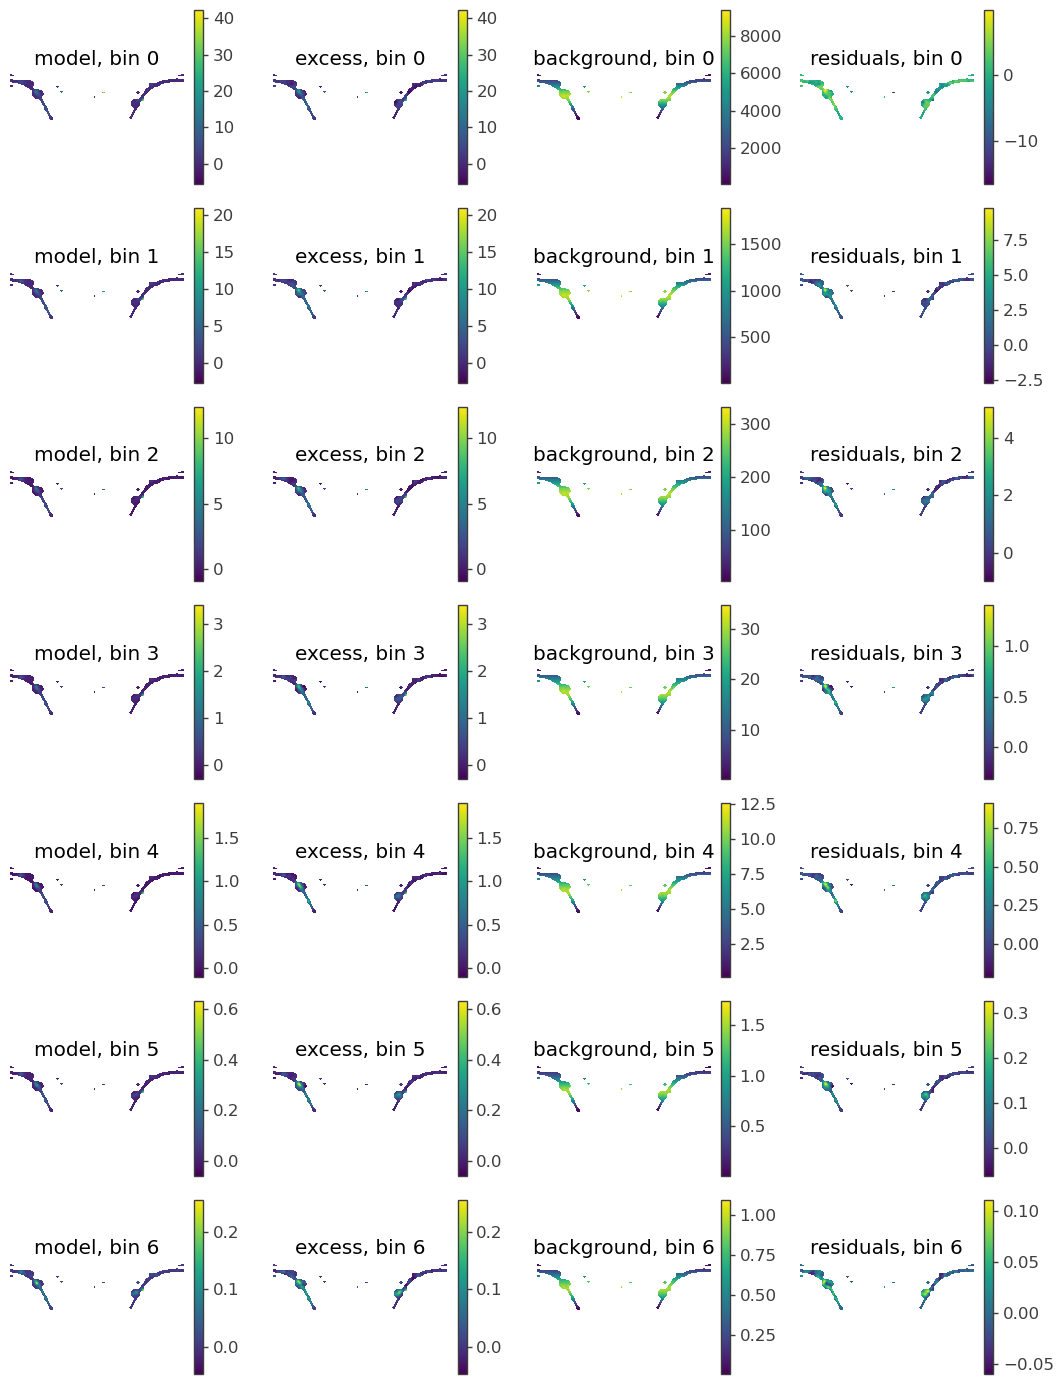

<Figure size 1920x1440 with 0 Axes>

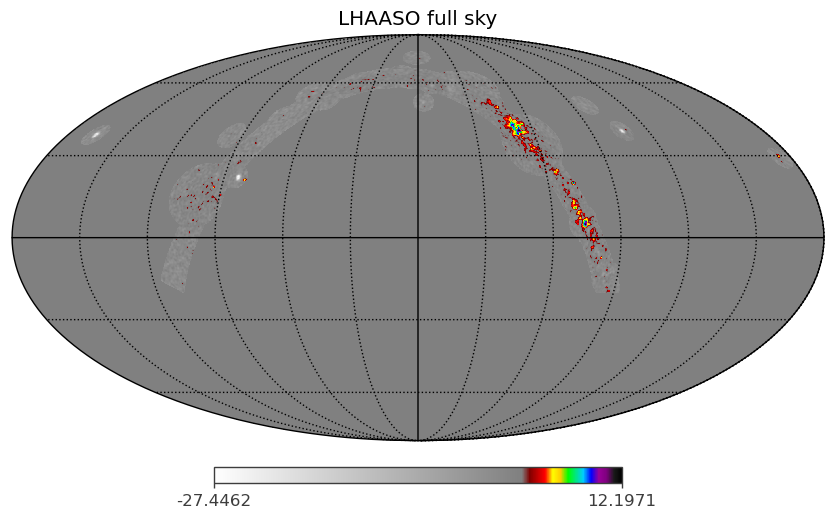

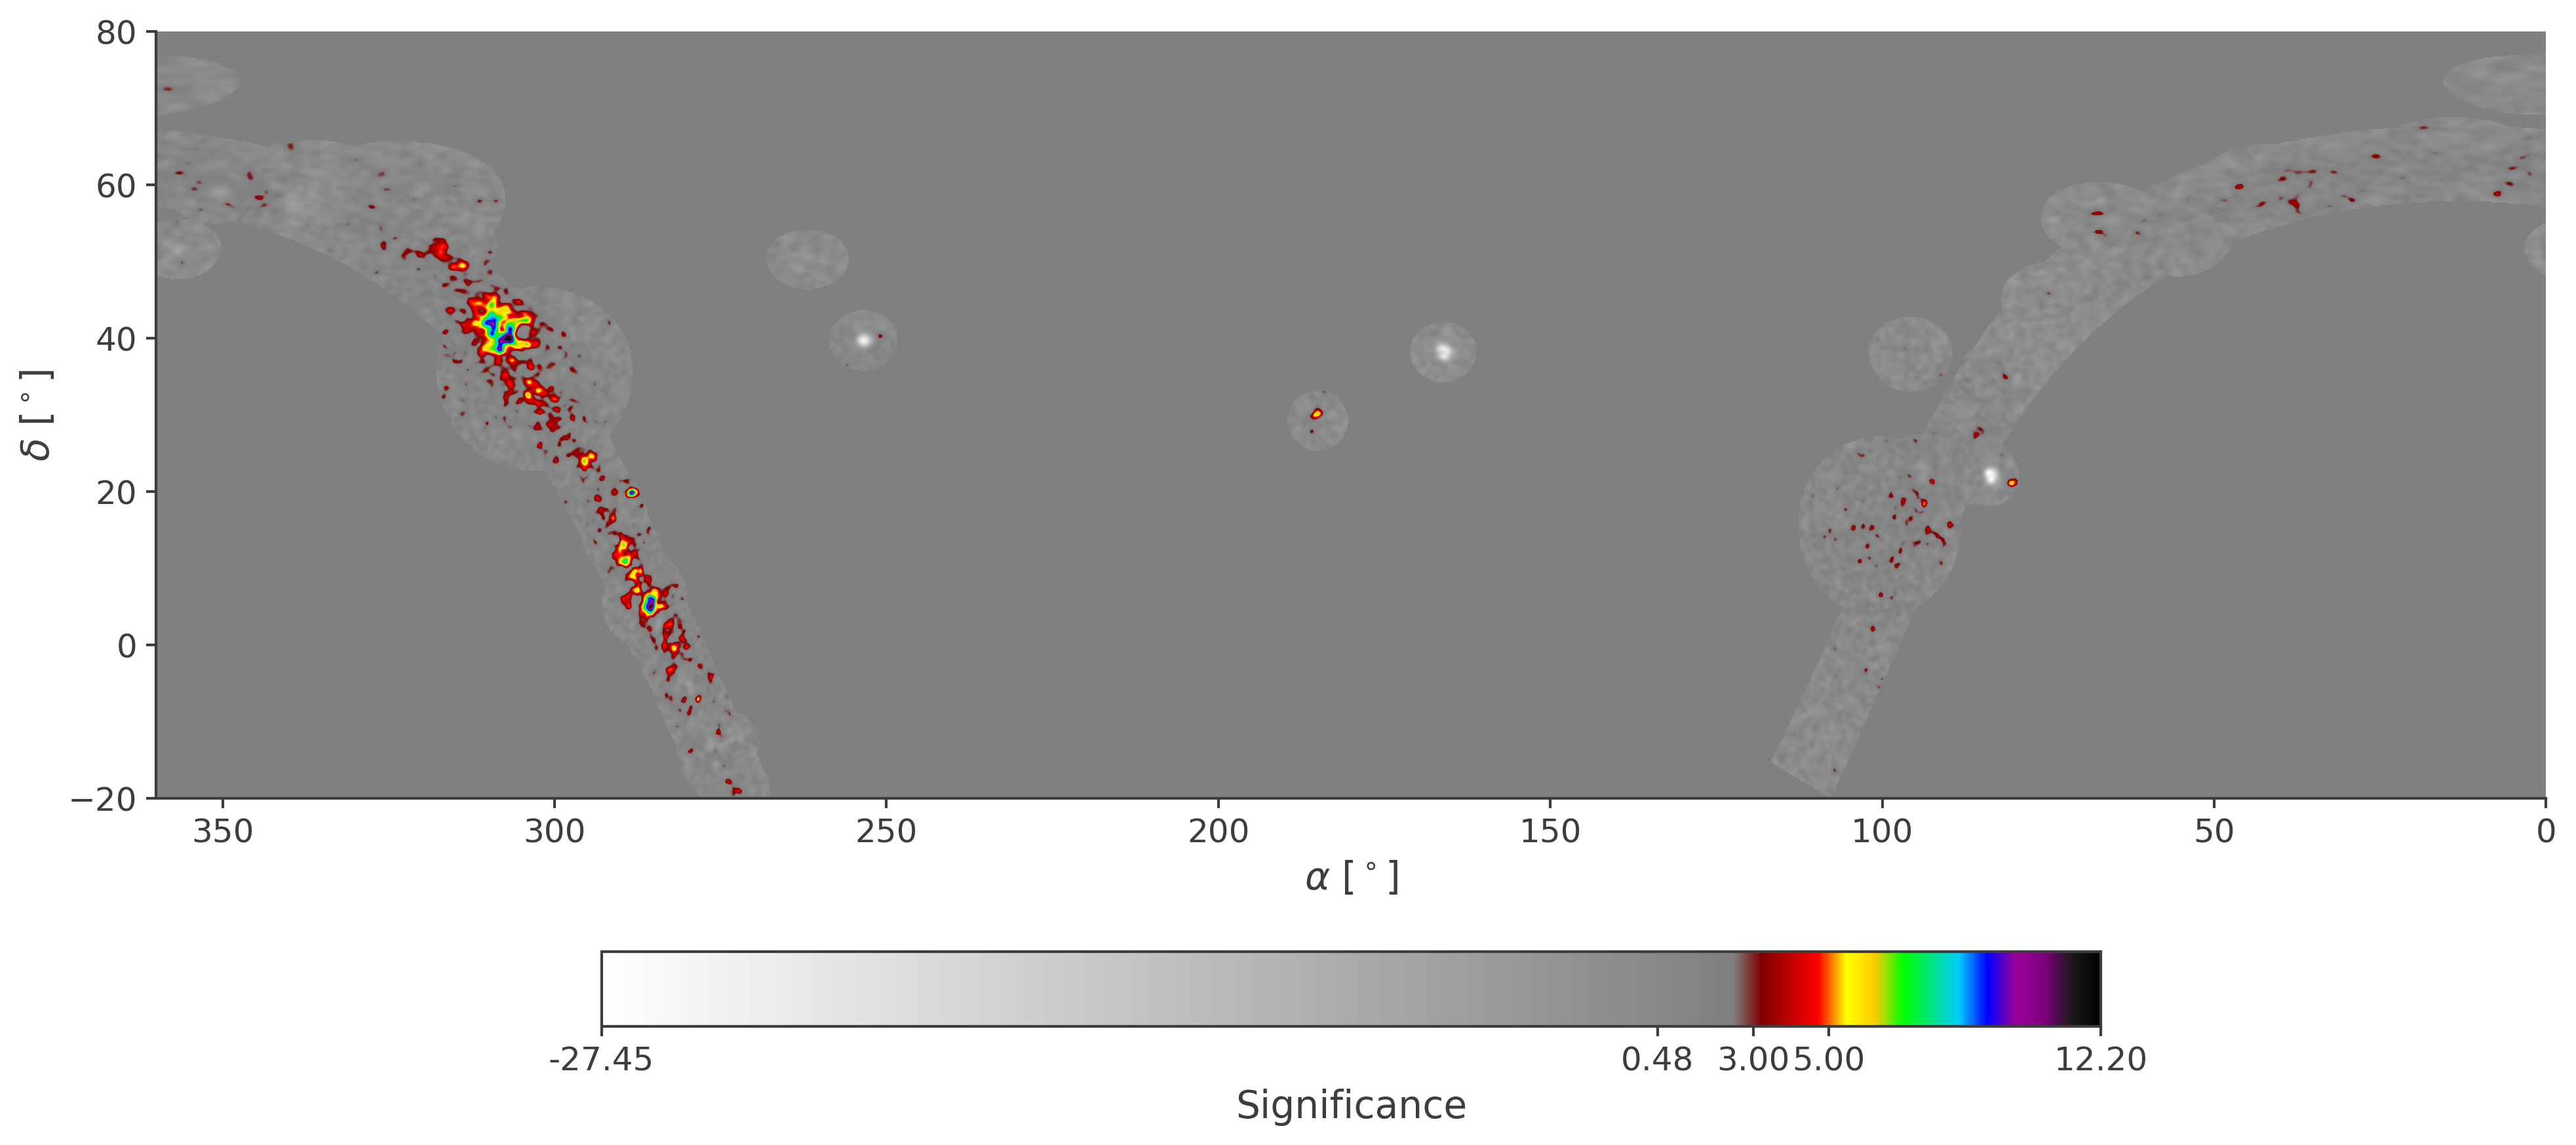

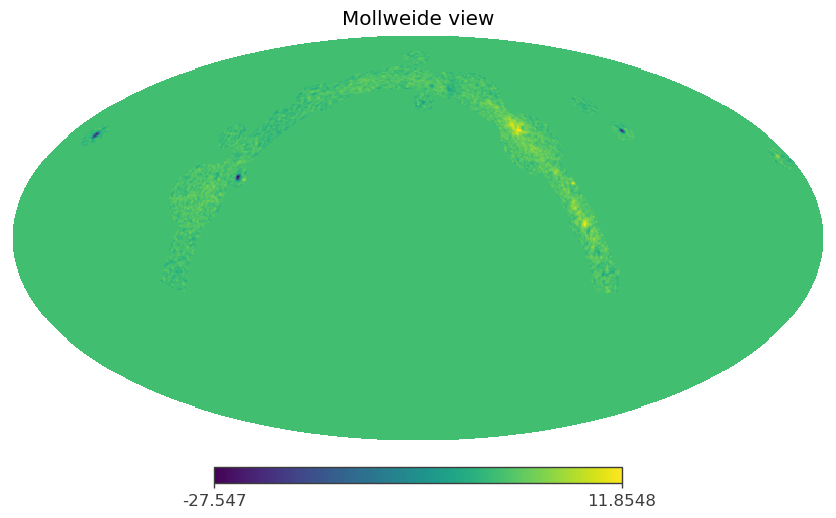

22:35:04 INFO      ************************                                                         ]8;id=166965;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=62528;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#640\640]8;;\

         INFO      [1.23258330e+05 4.21190035e-01 1.26490830e+00]                                   ]8;id=453826;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=451240;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#641\641]8;;\

         INFO      ************************                                                         ]8;id=734518;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=788426;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#642\642]8;;\

         INFO      max Significance= 12.2                                                           ]8;id=250919;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=357413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#643\643]8;;\

<Figure size 640x480 with 0 Axes>

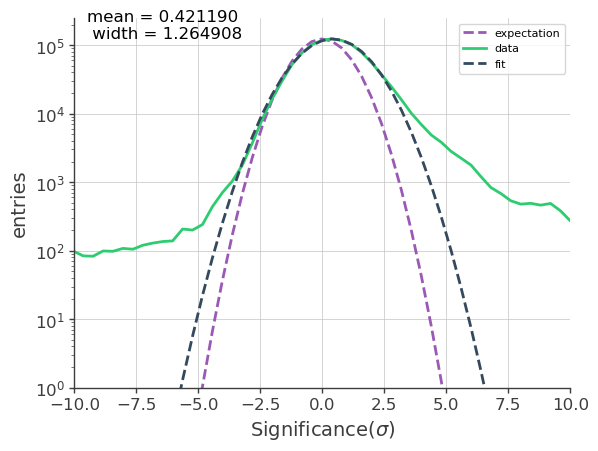

In [5]:
WCDA.psf_integration_method="exact"
lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
lm.display(complete=True)

result = my.fit(region_name, Modelname, WCDA, lm, 0, 6, verbose=False, mini="ROOT")
sources = my.get_sources(lm,result)

resu = my.getresaccuracy(WCDA, lm)
new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
print(new_source_lon_lat)
plt.figure()
# hp.gnomview(resu,norm='',lonra=[0, 360], latra=[-20, 80],reso=6, title=Modelname)
my.hpDraw(region_name, Modelname, resu,0,0,skyrange=(0,360,-20,80),
            colorlabel="Significance", contours=[1000], save=False, cat={}, color="Milagro", xsize=2048, plotmol=1, savename="fullsky_res", dpi=300, threshold=3)

nestid = hp.ring2nest(1024, np.arange(hp.nside2npix(1024)))
nestmap=np.zeros(hp.nside2npix(1024))
nestmap[nestid] = resu
nestmap = hp.ma(nestmap)
hp.mollview(nestmap, nest=1)
map2 = my.change_coord(resu,["C","G"])
hp.write_map(f"../res/{region_name}/{Modelname}/fullsky_{Modelname}_res.fits.gz",resu,overwrite=True)
hp.write_map(f"../res/{region_name}/{Modelname}/fullsky_{Modelname}_res.fits",map2,overwrite=True)
plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
plt.show()
plt.savefig(f"../res/{region_name}/{Modelname}/skymap_res.pdf",dpi=300)

plt.figure()
my.getsig1D(resu, region_name, Modelname, "Fullsky_ressig1D")

In [8]:
resdir = my.write_resmap(region_name, Modelname, WCDA, roi, maptree, response, ra1, dec1, f"Fullsky_{Modelname}",np.zeros(lm.get_number_of_point_sources()),np.zeros(lm.get_number_of_extended_sources()), data_radius=data_radius, ifrunllh=False)

23:48:40 INFO      Fullsky_Fullsky_freek_catalog_res                                                ]8;id=304783;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=277901;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#719\719]8;;\

23:48:41 INFO      processing at nHit00                                                             ]8;id=982611;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=350199;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:12:26<00:00, 1942.86it/s]


01:25:42 INFO      processing at nHit01                                                             ]8;id=1756;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=427535;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:07:29<00:00, 2085.37it/s]


02:58:03 INFO      processing at nHit02                                                             ]8;id=742584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=111517;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:04:18<00:00, 2188.46it/s]


04:25:22 INFO      processing at nHit03                                                             ]8;id=788477;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=16509;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:04:46<00:00, 2172.88it/s]


05:53:34 INFO      processing at nHit04                                                             ]8;id=322518;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=874172;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:03:43<00:00, 2208.23it/s]


07:20:39 INFO      processing at nHit05                                                             ]8;id=417113;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=882434;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

100%|██████████| 8443904/8443904 [1:04:53<00:00, 2168.71it/s]


08:48:38 INFO      processing at nHit06                                                             ]8;id=604013;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=446687;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#768\768]8;;\

In [ ]:
maptree = "../../data/WCDA_20240131_out.root"
response="../../data/DR_ihep_20240131_hscpsf_mc.root"
"/data/home/cwy/Science/3MLWCDA/Standard/res/Fullsky/Fullsky_catalog/Fullsky_fixsc.root"


In [ ]:
%matplotlib inline
resmap = my.getllhskymap(resdir, region_name, ra1, dec1, data_radius, ifsave=True, ifdraw=1, tofits=1)
my.getsig1D(resmap, region_name, Modelname, region_name)

In [6]:
print("Get spectrum point:")
Flux_WCDA1, jls1  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, pixelsize=0.2, acc=False)

Get spectrum point:


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.6 +/- 1.5) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,73960.454926
total,73960.454926


Values of statistical measures:

,statistical measures
AIC,147922.909852
BIC,147936.679781


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.3 +/- 1.1) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,74895.691914
total,74895.691914


Values of statistical measures:

,statistical measures
AIC,149793.383828
BIC,149807.153758


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(5.1 +/- 0.8) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,79350.471762
total,79350.471762


Values of statistical measures:

,statistical measures
AIC,158702.943525
BIC,158716.713455


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.00 +/- 0.12) x 10^-19,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,78388.307643
total,78388.307643


Values of statistical measures:

,statistical measures
AIC,156778.615287
BIC,156792.385216


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(6.5 +/- 1.4) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,77829.964012
total,77829.964012


Values of statistical measures:

,statistical measures
AIC,155661.928025
BIC,155675.697955


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(7.0 +/- 2.1) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,69344.748461
total,69344.748461


Values of statistical measures:

,statistical measures
AIC,138691.496923
BIC,138705.266852


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-3.0 +/- 2.5) x 10^-20,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,63080.092242
total,63080.092242


Values of statistical measures:

,statistical measures
AIC,126162.184485
BIC,126175.954415


100%|██████████| 7/7 [1:13:27<00:00, 629.59s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

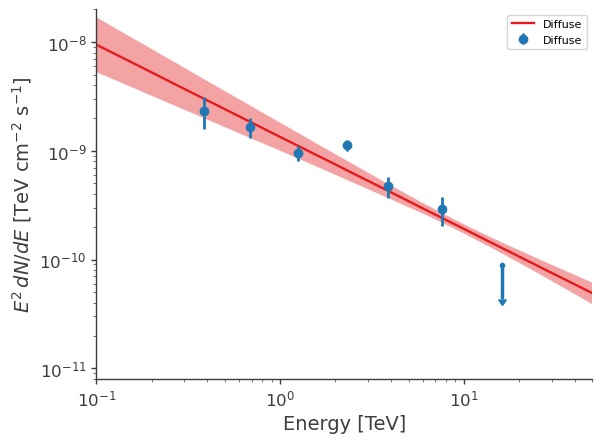

In [7]:
%matplotlib inline
import matplotlib as mpl

x_Max=50.
x_Min=0.1
y_Min=0.8e-11
y_Max=2e-8
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax,
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA1,"Diffuse","tab:blue")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')

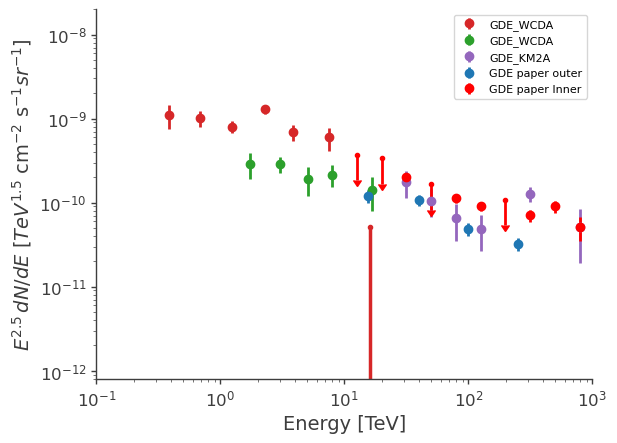

Load sub from Mystat: : 40it [00:20, 86.17it/s]

In [2]:
%matplotlib inline
x_Max=1000.
x_Min=0.1
y_Min=0.8e-12
y_Max=2e-8
fig,ax = plt.subplots()
my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/Fullsky/Fullsky_fix_vf_catalog/Spectrum_Diffuse.txt", label="GDE_WCDA", color="tab:red", scale=1/1.3335219352536694, index=-2.5) #
my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/J0057/1ext_freeDGE_1_6/Spectrum_Diffuse.txt", label="GDE_WCDA", color="tab:green", scale=1/0.05955658127226221, index=-2.5)
# data1 = my.Draw_spectrum_fromfile("/data/home/cwy/Science/3MLWCDA/Standard/res/J0057/1ext_freeDGE_1_6/Spectrum_J0057.txt", label="1ext_freeDGE", color="tab:red")
# plt.figure()
# E = dataGDE[0]
# F = dataGDE[1]/0.05955658127226221 #*E**0.5
# Fe = dataGDE[2]/0.05955658127226221 #*E**0.5
# plt.errorbar(E, F, yerr=Fe, fmt='o', label="1ext_freeDGE", color="tab:red")
diffusekm2a = np.loadtxt("/data/home/cwy/Science/3MLWCDA/Standard/res/J0057/diffuseKM2A.txt")
e = diffusekm2a[:,0]
f = diffusekm2a[:,3]*e**0.5*0.02875689093949542/0.04388850451996416
fe = (diffusekm2a[:,5]-diffusekm2a[:,3])*e**0.5*0.02875689093949542/0.04388850451996416
plt.errorbar(e, f, yerr=fe, fmt='o', label="GDE_KM2A", color="tab:purple")
my.drawDig("/data/home/cwy/Science/3MLWCDA/Standard/res/J0057/GDE_LHAASOpaper.csv", fixx=1, fixy=1, color="tab:blue", label="GDE paper outer")
my.drawDig("/data/home/cwy/Science/3MLWCDA/Standard/res/Fullsky/Fullskydata.csv", fixx=1, fixy=1, color="red", label="GDE paper Inner")
ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^{2.5}\,dN/dE$ [$TeV^{1.5}$ cm$^{-2}$ s$^{-1} sr^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()